In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [35]:
iris = datasets.load_iris()
x=iris.data
y=iris.target



In [36]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


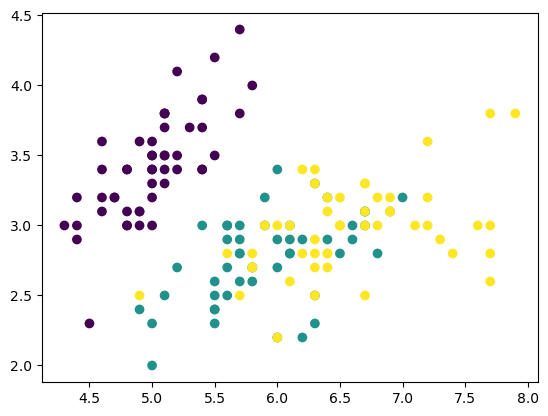

In [37]:
plt.scatter(x[:,0],x[:,1],c=y)


In [38]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)

C:\Users\RAJESH SOLANKI\AppData\Local\Temp\ipykernel_22400\2202936028.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], label='setosa', cmap='viridis')
C:\Users\RAJESH SOLANKI\AppData\Local\Temp\ipykernel_22400\2202936028.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], label='versicolor', cmap='viridis')
C:\Users\RAJESH SOLANKI\AppData\Local\Temp\ipykernel_22400\2202936028.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1], label='virginica', cmap='viridis')


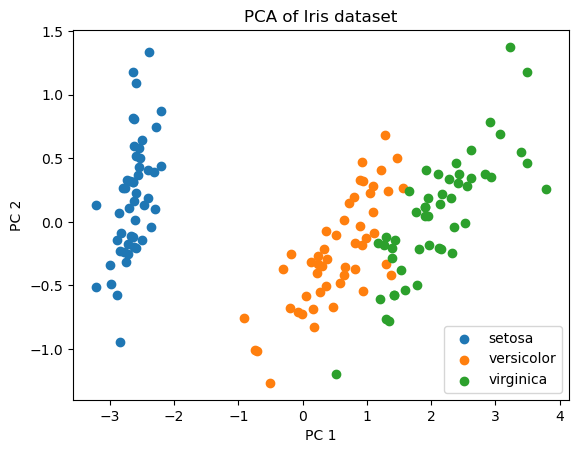

In [39]:
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], label='setosa', cmap='viridis')
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], label='versicolor', cmap='viridis')
plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1], label='virginica', cmap='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of Iris dataset')
plt.legend()
plt.show()

Text(0.5, 1.0, 'PCA (top 2 component) of iris dataset')

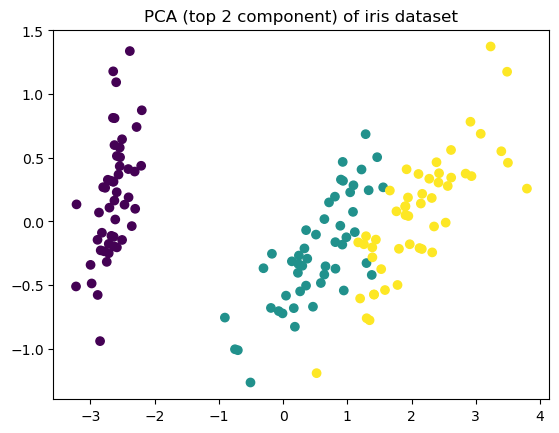

In [40]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.title("PCA (top 2 component) of iris dataset")

Text(0.5, 1.0, 'tnse plot of iris dataset')

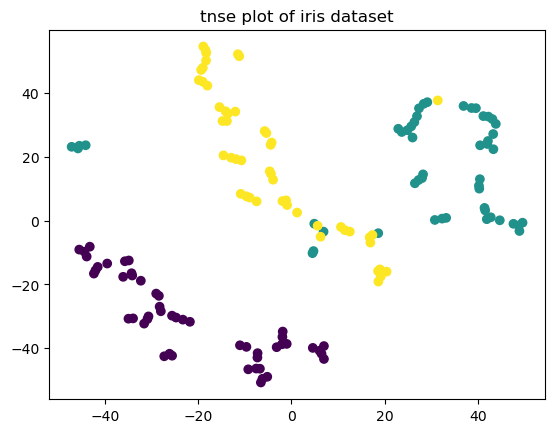

In [41]:
# we can see that the purple class is linearly seperable
X_e = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(iris.data)
plt.scatter(X_e[:,0],X_e[:,1],c=y)
plt.title("tnse plot of iris dataset")

In [42]:
df1=pd.read_csv("adult.csv",header=None)
df1.head()

df1.columns=["age","sector","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital gain","capital loss","hours-per-week","native-country","income"]
df1.head()

,age,sector,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot: xlabel='education'>

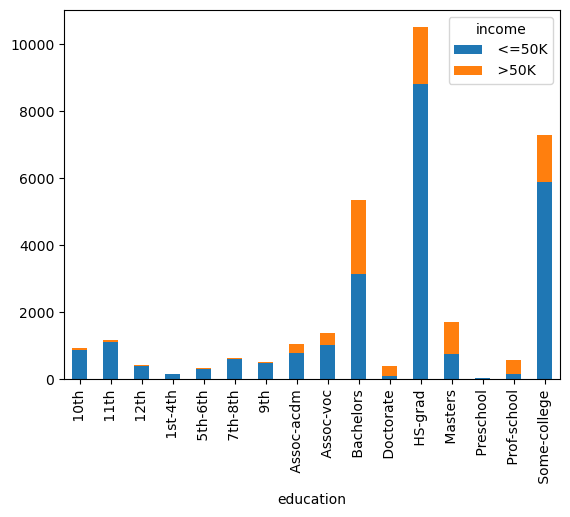

In [55]:
education_income = df1.groupby(["education", "income"]).size().unstack()
education_income.plot(kind="bar",stacked=True)

<AxesSubplot: xlabel='occupation'>

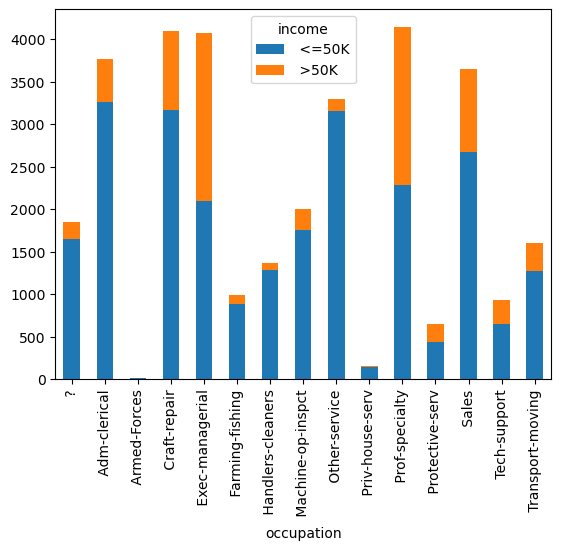

In [43]:
occupation_income = df1.groupby(["occupation", "income"]).size().unstack()
occupation_income.plot(kind="bar",stacked=True)

<AxesSubplot: xlabel='marital-status'>

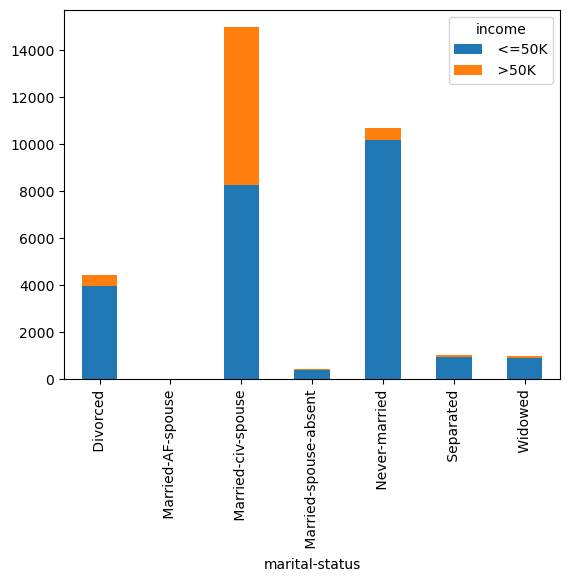

In [44]:
maternal_income = df1.groupby(["marital-status", "income"]).size().unstack()
maternal_income.plot(kind="bar",stacked=True)

<AxesSubplot: ylabel='occupation'>

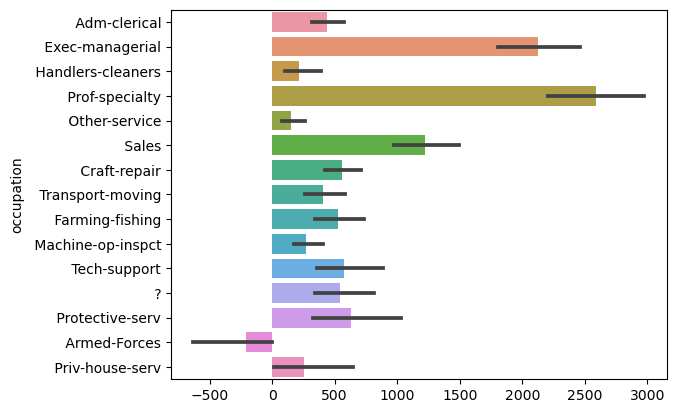

In [45]:
import seaborn as sns
# sns.set_color_codes("pastel")

sns.barplot(y=df1["occupation"],x=df1["capital gain"]-df1["capital loss"])

In [46]:
# Listing of attributes:

# >50K, <=50K.

# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

(we can observe that avg age of people having income >50K are more then of income <50k )

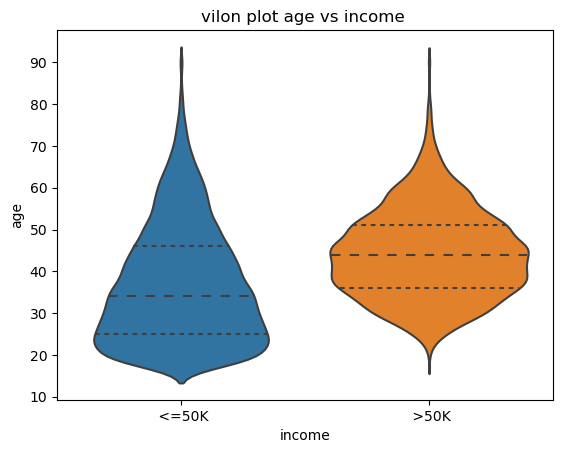

In [51]:
sns.violinplot(x='income', y='age', data=df1, inner='quartile')
plt.title("vilon plot age vs income ")
plt.show()

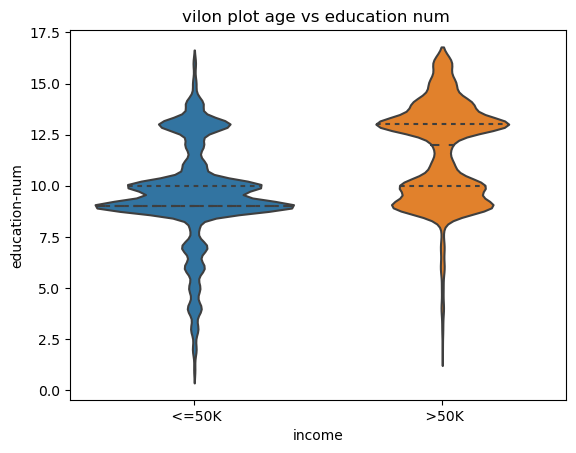

In [54]:
sns.violinplot(x='income', y='education-num', data=df1, inner='quartile')
plt.title("vilon plot age vs education num ")
plt.show()

Text(0.5, 1.0, 'comparision of sex wise income (we can observe little class imbalance)')

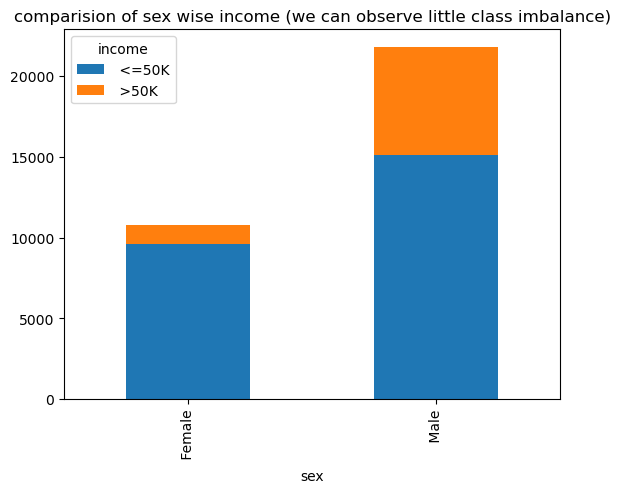

In [48]:
sex_income = df1.groupby(["sex", "income"]).size().unstack()

sex_income.plot(kind="bar",stacked=True)
plt.title("comparision of sex wise income (we can observe little class imbalance)")

Text(0.5, 1.0, 'comparision of race wise income (here we can see the data is skew)')

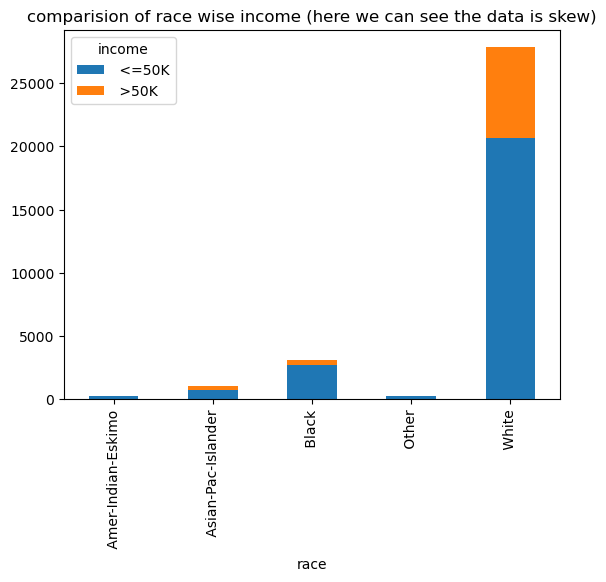

In [49]:
race_income = df1.groupby(["race", "income"]).size().unstack()

race_income.plot(kind="bar",stacked=True)
plt.title("comparision of race wise income (here we can see the data is skew)")

<AxesSubplot: xlabel='age', ylabel='hours-per-week'>

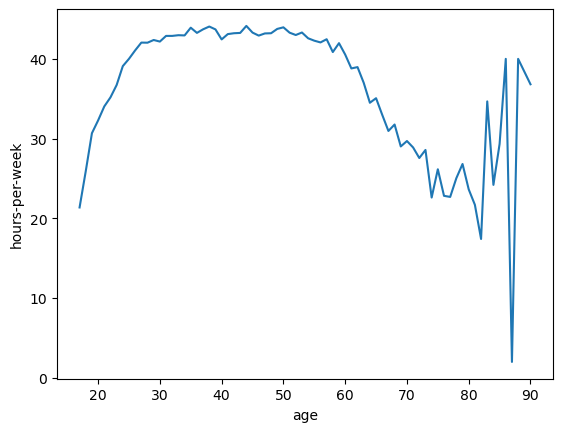

In [59]:
sns.lineplot(data=df1, x='age',y="hours-per-week",ci=None)


C:\Users\RAJESH SOLANKI\AppData\Local\Temp\ipykernel_22400\2293649537.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


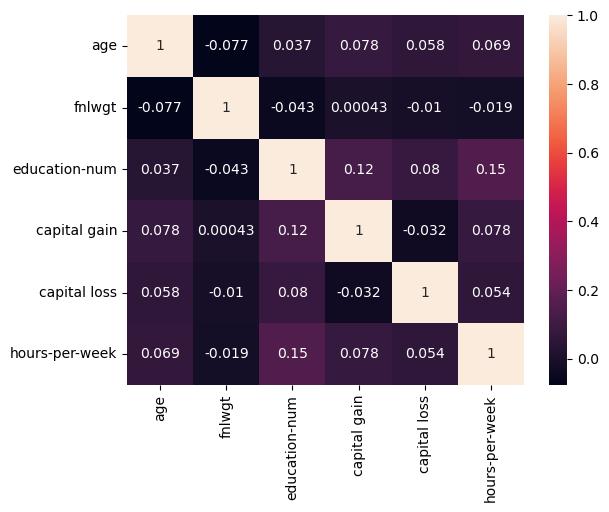

In [50]:
corr = df1.corr()
sns.heatmap(corr, annot=True)
plt.show()